# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 23.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
# %load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores


from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Loading the dataset

In [3]:
Loan_data = pd.read_csv("Loan_Modelling.csv")

In [4]:
data = Loan_data.copy()

## Data Overview

* Observations
   * There are total 5000 records in the data set
   * CCAvg is the only col with Float data type , rest all of the col are of data type int
   * Average Age of Customers in the data set is 45yrs with 67 yrs as Max Age.
   * 75% of the customers age is 55 yrs and exp of 30 years which means they might have accumulated savings over a period of time , if no other liablities
   * Mean Experience is around 20 Yrs with max of 43 years
   * Min Experience is listed as -3, negative experience data would need correction.
   * Average Income is around 74k Dollars with a min of 8000 Dollars and max of 239000 Dollars.
   * Average Family size is 2 with a max of 4
   * Max Morgage taken by the cutomers is $635 that proves the problem statement this set of group has not explore options for Loans so far
* Sanity checks
   * Negative Experience to be substituted with Positive values
   * Map Education - Undergraduate to 1, Graduate to 2 , Proffesioal to 3.


In [5]:
round(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.0,1444.0,1.0,1251.0,2500.0,3750.0,5000.0
Age,5000.0,45.0,11.0,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.0,11.0,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,74.0,46.0,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.0,1759.0,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.0,1.0,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,2.0,2.0,0.0,1.0,2.0,2.0,10.0
Education,5000.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.0,102.0,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [8]:
data.shape

(5000, 14)

There are total 5000 Records in the Data set

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [11]:
# checking for unique values in ID column

data["ID"].nunique()

5000

Since all the  5000 ID are Unique , we can drop the ID column

In [12]:
##Dropping the ID col
data.drop("ID",axis=1,inplace=True)

In [13]:
#checking the count for negative Experience
negExp = data.Experience < 0
negExp.value_counts()


False    4948
True       52
Name: Experience, dtype: int64

In [15]:
# Checking all the negative values present in the Experience column
data[data['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

There are total 5000

In [15]:
# Correcting the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [14]:
# Checking if any negative values still present in the Experience column
data[data['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [16]:
# Let's map the values to 1: Undergrad; 2: Graduate 3: Advanced/Professional
data["Education"].replace(1, "Undergraduate", inplace=True)
data["Education"].replace(2, "Graduate", inplace=True)
data["Education"].replace(3, "Professional", inplace=True)


In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [18]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

In [19]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
Personal_Loan: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
Securities_Account: Does the customer have securities account with the bank? (0: No, 1: Yes)
CD_Account: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
Online: Do customers use internet banking facilities? (0: No, 1: Yes)
CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

In [20]:
# converting categorical varaible to category type
category_col = ['Education','Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard','ZIPCode']
data[category_col] = data[category_col].astype('category')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [22]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Age
* Median Age of Customers is 45
* Histogram is normally distributed

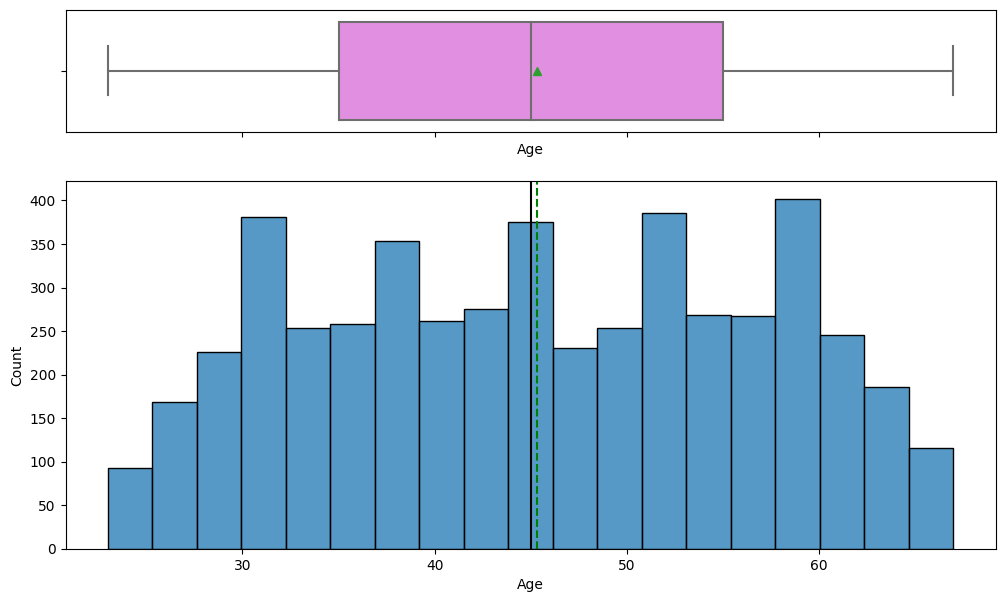

In [24]:
histogram_boxplot(data, "Age")

#### Observations on Experience
* Histogram is normally distributed
* Median experience is 20yrs
* 8,18,25,35 is the experience set for the majority of customers

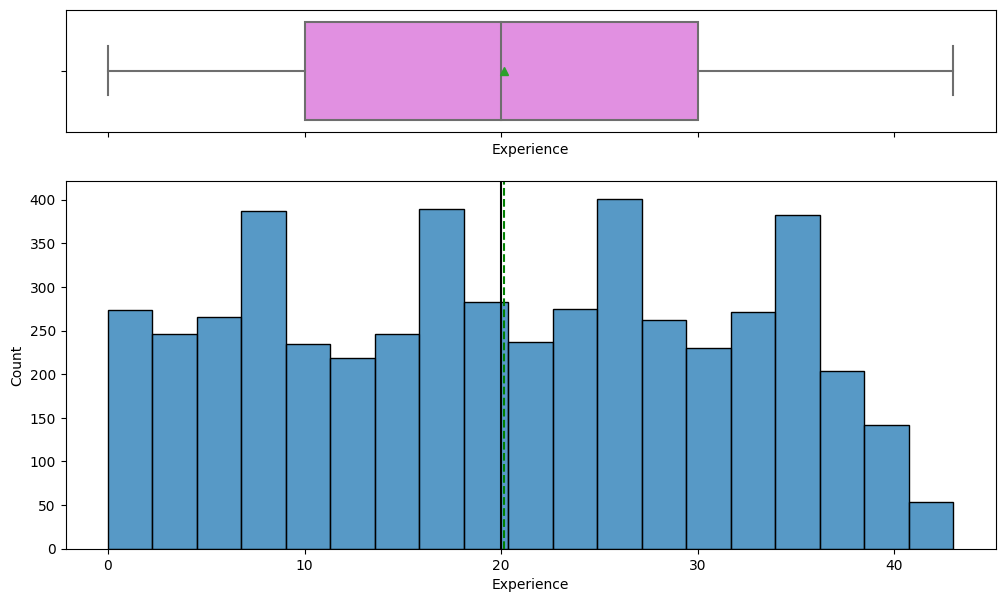

In [38]:
histogram_boxplot(data,'Experience')

#### Observations on Income
* Income histogram looks right skewed
* Median Income is around 75k dollars
* Customers in the income group 40-45k looks highest
* very few Customers with 200k+ income

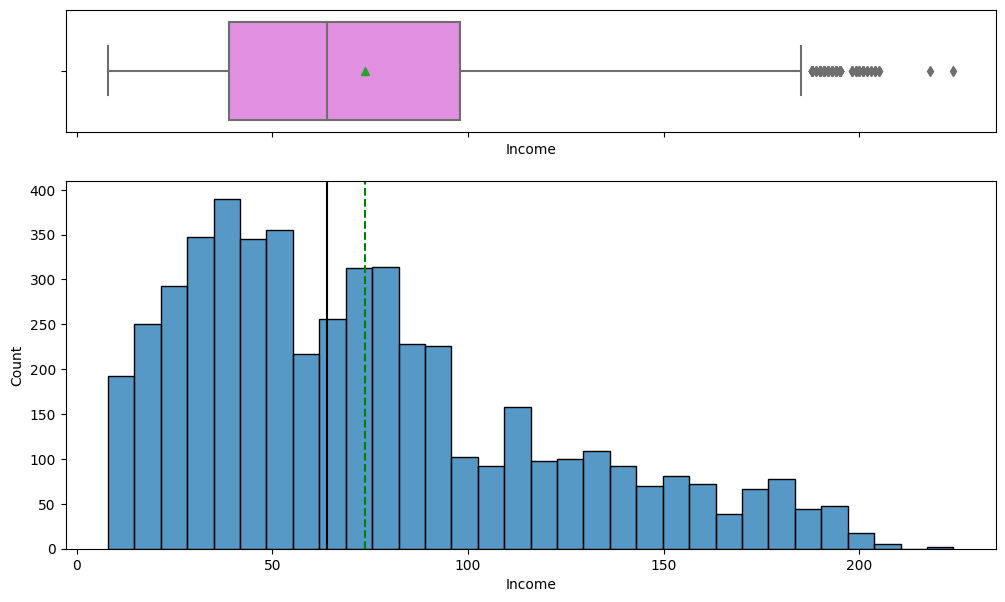

In [25]:
histogram_boxplot(data,'Income')

#### Observations on CCAvg
* histogram_boxplot(data,'CCAvg')
* Histogram looks right skewed
* Boxplot shows presence of outliers
* Median spending on credit card is around 2k Dollars
* Majority of customers have 0 and less then 2k in spending on Credit Cards
* Most of the customers average spending is b/w 1 to 2.5k
* Very few customers with Average spending more then 8k

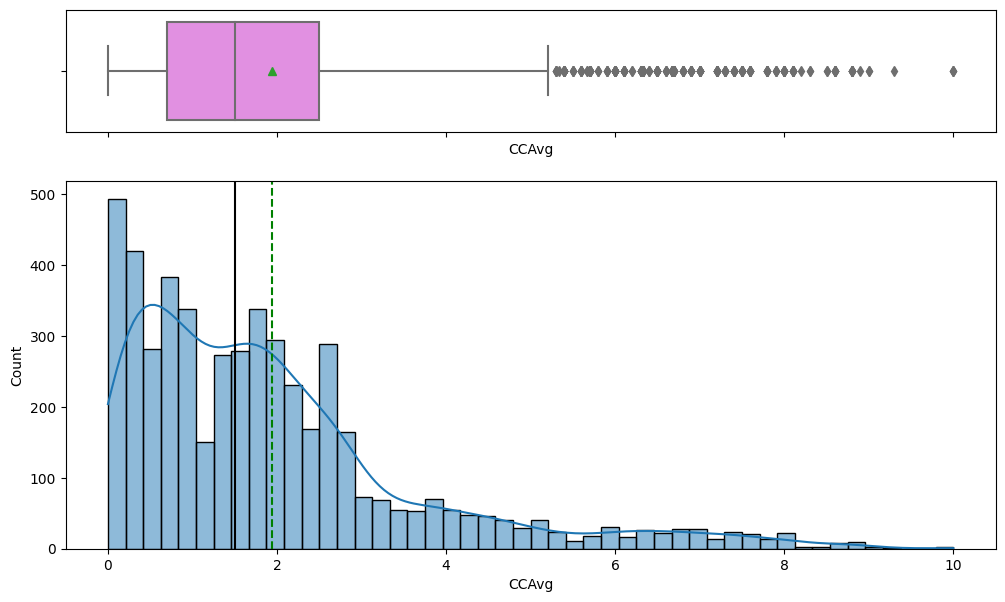

In [43]:
histogram_boxplot(data,'CCAvg',kde=True)


#### Observations on Mortgage
* Majority of Customers don't have a Mortgage
* Boxplot shows presense of some outliers
* Median mortgage is around $55k
* Histgram suggest very few customers have mortgage within the range of 100-200k

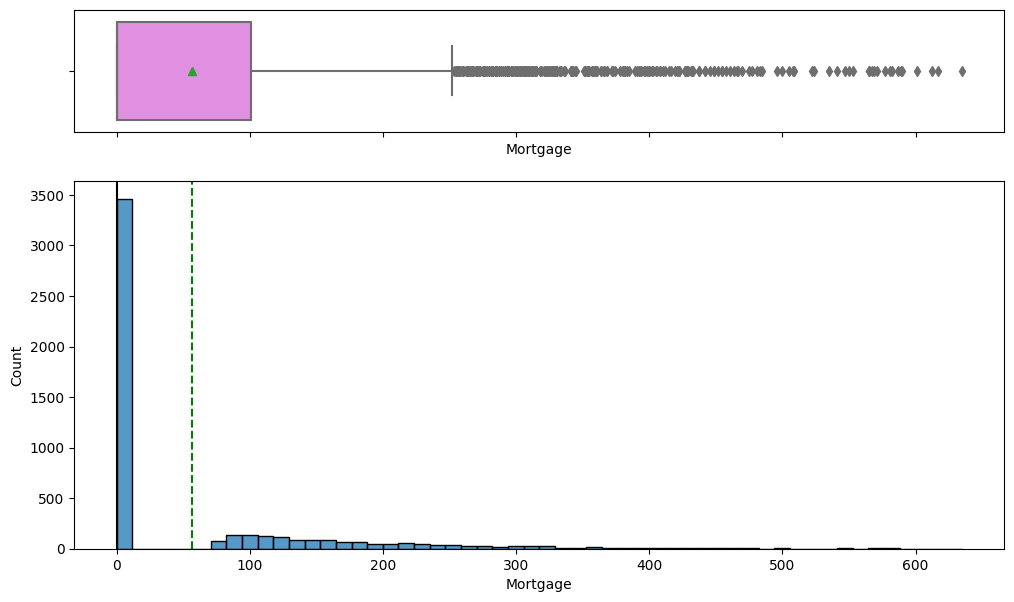

In [42]:
histogram_boxplot(data,'Mortgage')

#### Observations on Family
* Majoirtiy of customers are in the single family with 29.4%

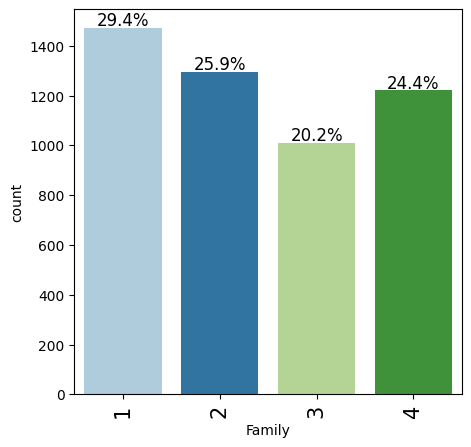

In [26]:
labeled_barplot(data, "Family", perc=True)

#### Observations on Education
* Education has 3 categories - Graduate, UnderGraduate and Proffesional
* Majority of Customers are undergraduate

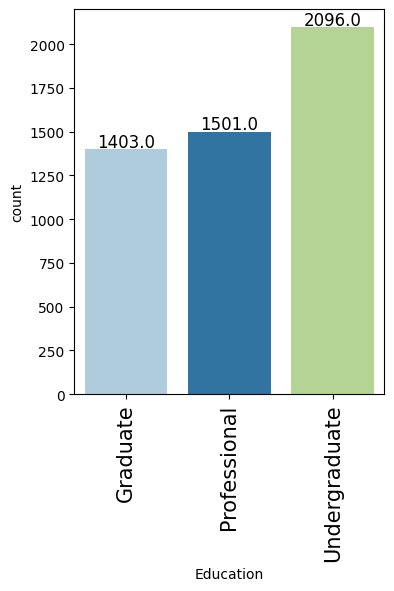

In [27]:
labeled_barplot(data,'Education')   ## Complete the code to create labeled_barplot for Education

#### Observations on Securities_Account
* Very few customers -522 has a securities account with the Bank

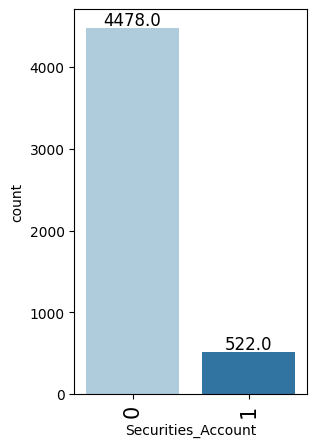

In [28]:
labeled_barplot(data,'Securities_Account')   ## Complete the code to create labeled_barplot for Securities_Account

#### Observations on CD_Account
* More then 90% of customers-  4698 doesn't have CD Account with the bank. This set of customers could be motivated for a Loan with the bank

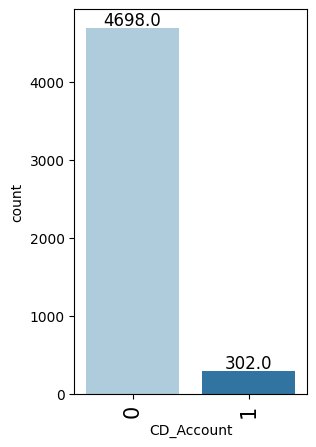

In [30]:
labeled_barplot(data,'CD_Account')   ## Complete the code to create labeled_barplot for CD_Account

#### Observations on Online
* 59.7% of Customers don't have Online Account Yet

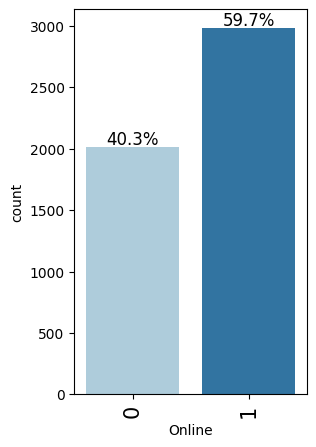

In [31]:
labeled_barplot(data,'Online',perc=True)   ## Complete the code to create labeled_barplot for Online

#### Observation on CreditCard
* 70% of Customers don't have Credit Card

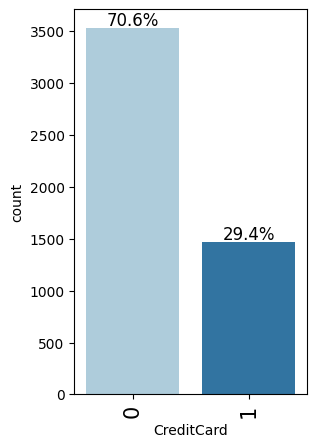

In [33]:
labeled_barplot(data,'CreditCard',perc=True)   ## Complete the code to create labeled_barplot for CreditCard

#### Observation on ZIPCode
* Maximum customers reside in the ZipCode start with 94 followed by ZipCode starting with 92
* we may not need this col

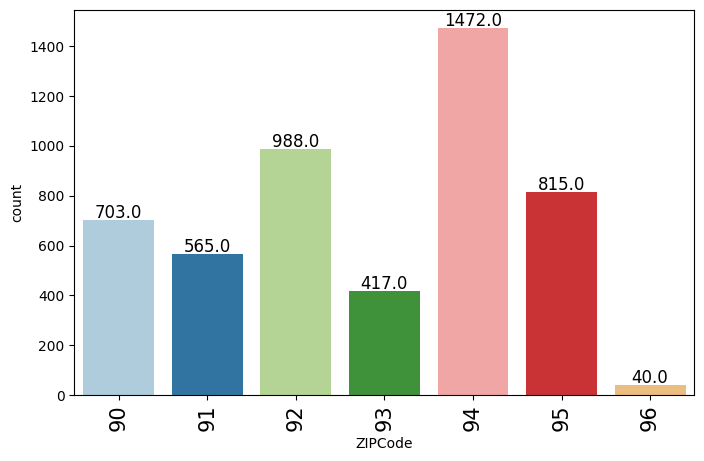

In [70]:
labeled_barplot(data,'ZIPCode')   ## Complete the code to create labeled_barplot for ZIPCode

### Bivariate Analysis

In [26]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [27]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Correlation check
* Experience and Age is Highly Correlated
* CCAvg and Income are moderately Correlated

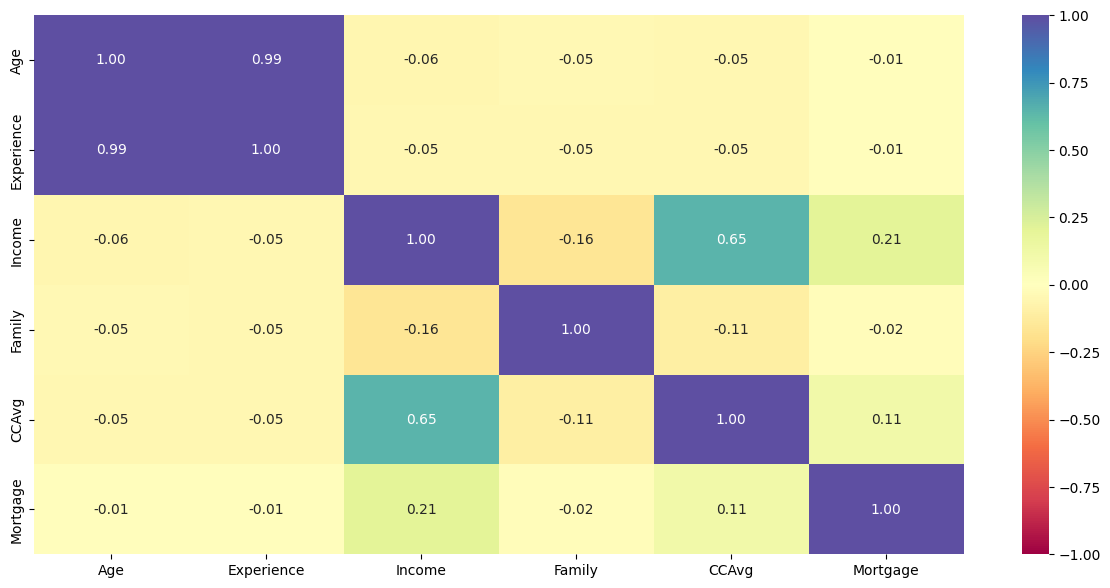

In [28]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

#### Personal_Loan vs Education
* Professional's seems to have more loans followed by Graduate with a marginal diff

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


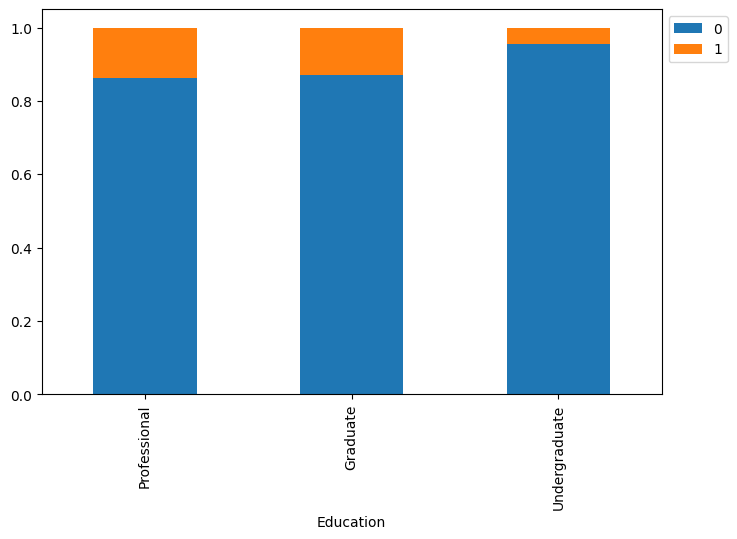

In [29]:
stacked_barplot(data, "Education", "Personal_Loan")

#### Personal_Loan vs Family
* A Family of 4 have more personal loans ,followed by family of 3

Family            1     2     3     4   All
Personal_Loan                              
All            1472  1296  1010  1222  5000
0              1365  1190   877  1088  4520
1               107   106   133   134   480
------------------------------------------------------------------------------------------------------------------------


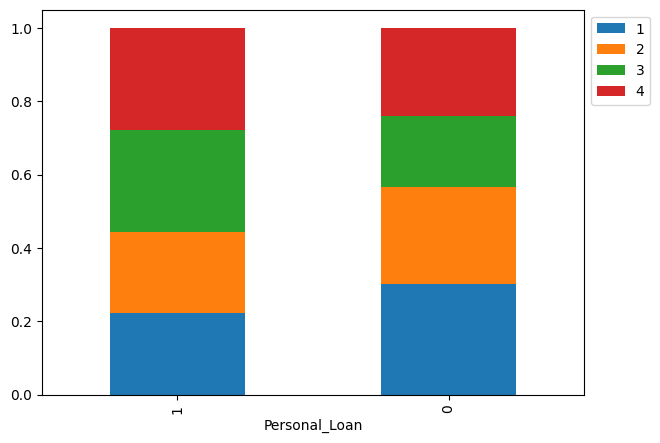

In [86]:
stacked_barplot(data,"Personal_Loan","Family")  ## Complete the code to plot stacked barplot for Personal Loan and Family

#### Personal_Loan vs Securities_Account

Securities_Account     0    1   All
Personal_Loan                      
All                 4478  522  5000
0                   4058  462  4520
1                    420   60   480
------------------------------------------------------------------------------------------------------------------------


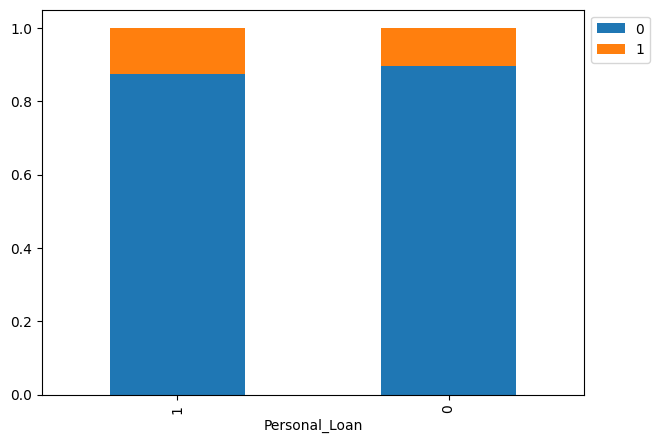

In [47]:
stacked_barplot(data,"Personal_Loan","Securities_Account") ## Complete the code to plot stacked barplot for Personal Loan and Securities_Account

#### Personal_Loan vs CD_Account

CD_Account        0    1   All
Personal_Loan                 
All            4698  302  5000
0              4358  162  4520
1               340  140   480
------------------------------------------------------------------------------------------------------------------------


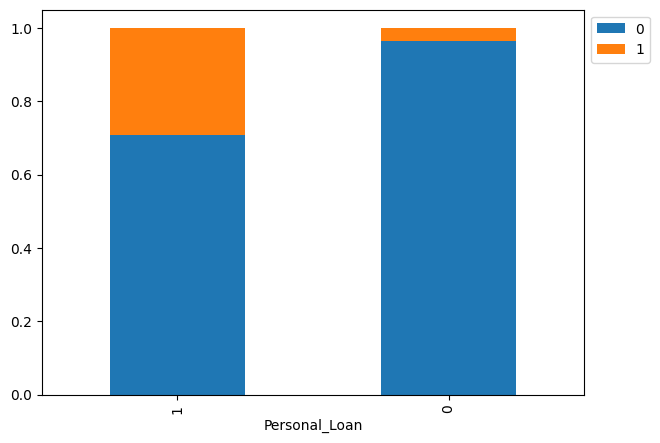

In [50]:
stacked_barplot(data,"Personal_Loan","CD_Account") ## Complete the code to plot stacked barplot for Personal Loan and CD_Account

#### Observation
* Age and Experience are heavily positively correlated.
* CCAvg and Income are positively correlated.

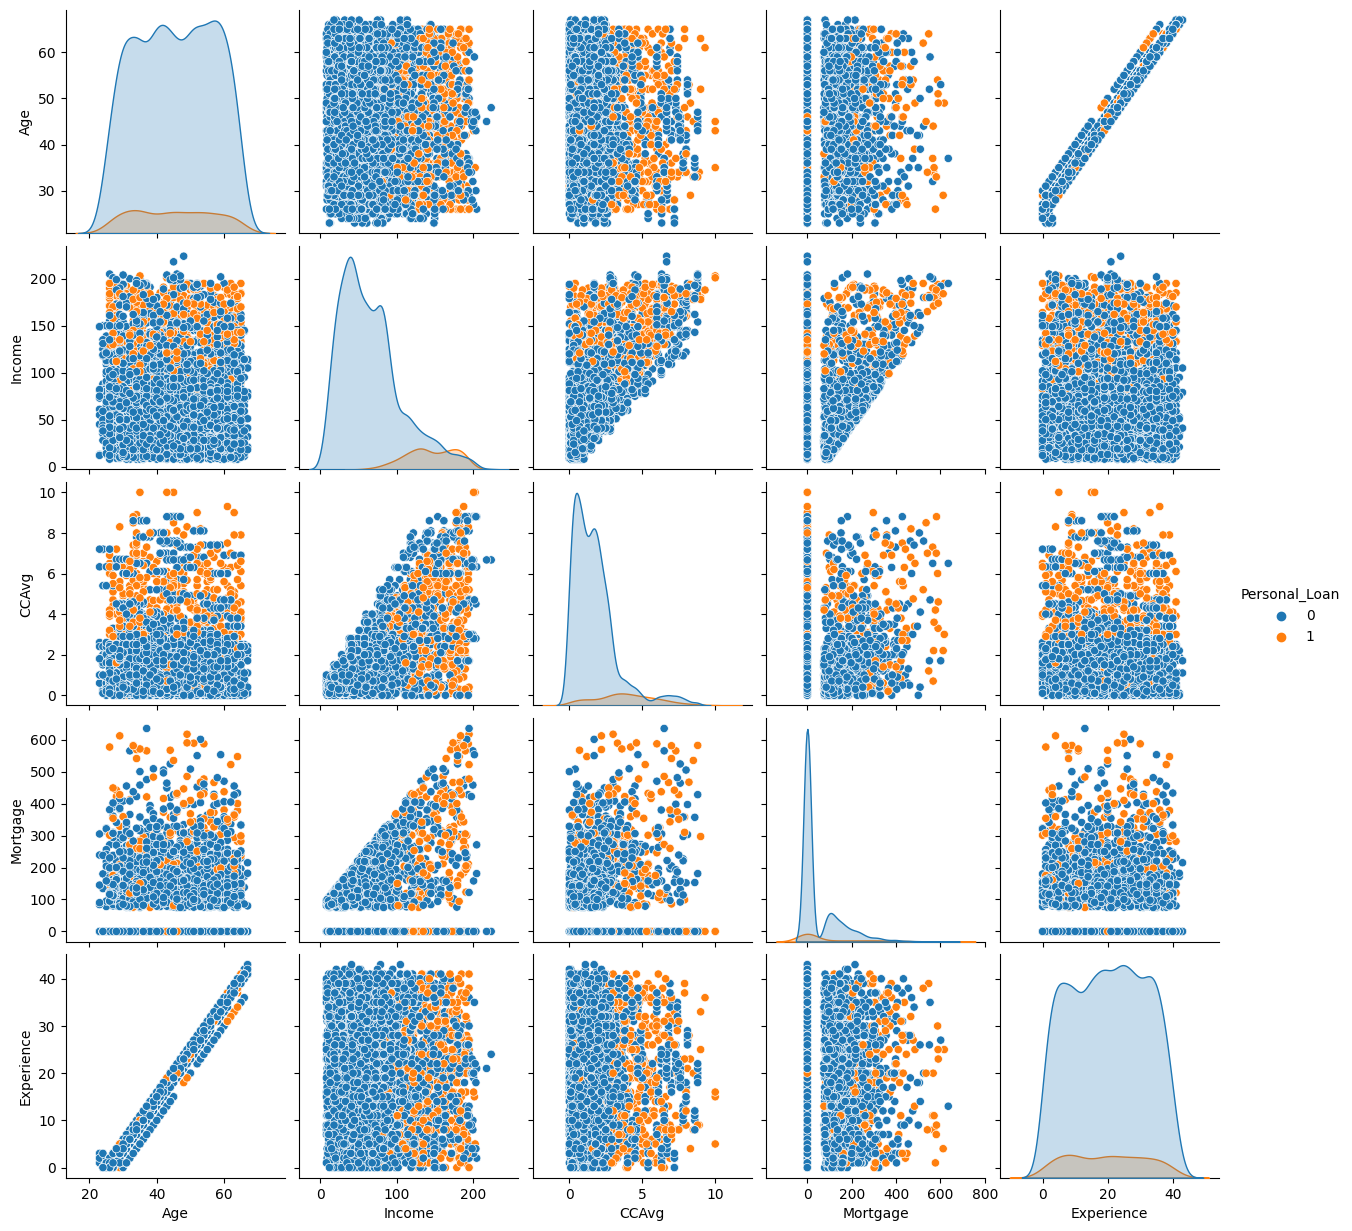

In [69]:
sns.pairplot(data=data[['Age','Income','ZIPCode','CCAvg','Mortgage','Experience','Personal_Loan']],hue='Personal_Loan');

#### Personal_Loan vs  Family and Income
* Family with size 3 and 4 and Income Bracket of 100-200 are more likey to get a loan

<Figure size 800x800 with 0 Axes>

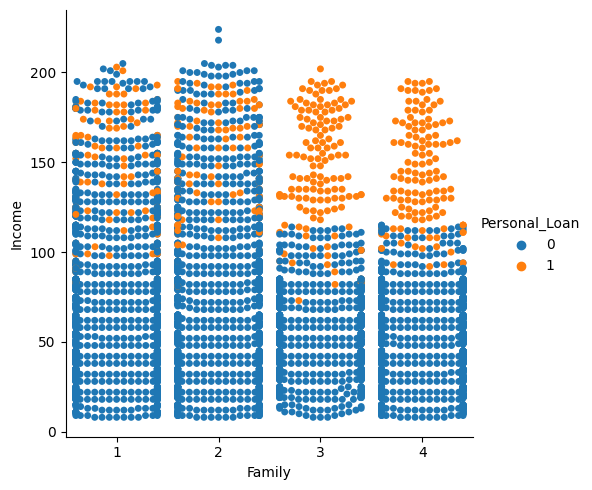

In [98]:
plt.figure(figsize = (8,8))
sns.catplot(x='Family', y='Income', hue='Personal_Loan', data = data, kind='swarm')


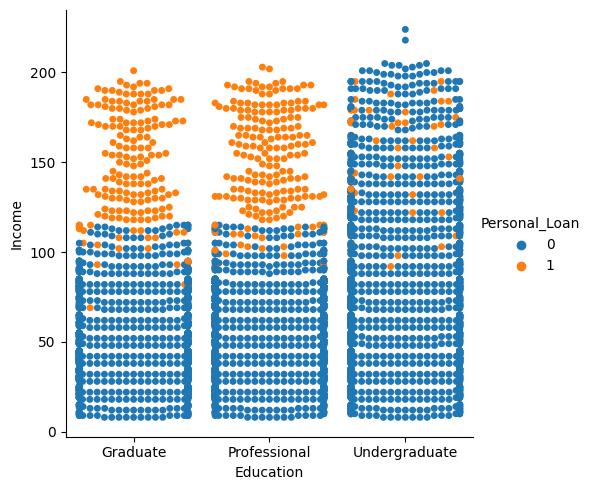

In [100]:
sns.catplot(x='Education', y='Income', hue='Personal_Loan', data = data, kind='swarm')

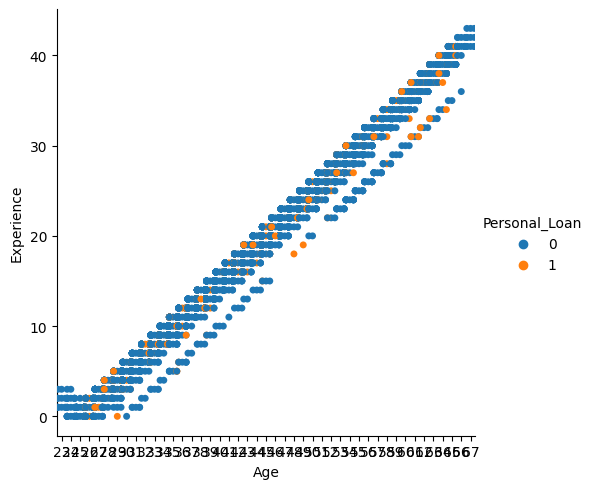

In [30]:
sns.catplot(x='Age', y='Experience', hue='Personal_Loan', data = data, kind='swarm')

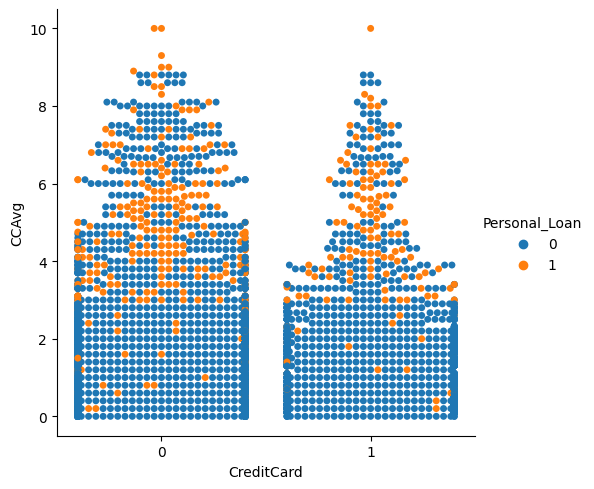

In [31]:
sns.catplot(x="CreditCard", y='CCAvg', hue="Personal_Loan", data=data,kind='swarm')

## Data Preprocessing

#### Outlier Detection

In [73]:
Q1 = data.quantile(.25)  # Complete the code to find the 25th percentile and 75th percentile.
Q3 = data.quantile(.75)  # Complete the code to find the 75th percentile and 75th percentile.

IQR = Q3 - Q1               # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [74]:
((data.select_dtypes(include=["float64", "int64"]) < lower)
    |(data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

## Model Building

### Model Evaluation Criterion

* The objective is to predict whether a liability customer will buy personal loans


### Model Building

In [52]:
# Separate independent and dependent variable
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

In [53]:
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Complete the code to split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [54]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(X.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(X_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Age  Income  Family  CCAvg  Mortgage  Securities_Account  CD_Account  Online  CreditCard  ZIPCode_91  ZIPCode_92  ZIPCode_93  ZIPCode_94  ZIPCode_95  ZIPCode_96  Education_Professional  Education_Undergraduate
36   80      4       2.20   0         0                   0           1       0           0           0           0           1           0           0           0                       0                          0.0004
23   12      4       1.00   0         1                   0           0       1           0           0           0           0           1           0           0                       1                          0.0002
52   61      4       1.80   207       0                   0           0       0           0           1           0           0           0           0           1                       0                          0.0002
     65      1       0.

In [57]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train,y_train)  ## Complete the code to fit decision tree on train data

DecisionTreeClassifier(random_state=1)

### Model Performance Improvement

Model can make wrong predictions as:

Predicting a customer will take the personal loan but in reality the customer will not take the personal loan - Loss of resources
Predicting a customer will not take the personal loan but in reality the customer was going to take the personal loan - Loss of opportunity
Which case is more important?

Losing a potential customer by predicting that the customer will not be taking the personal loan but in reality the customer was going to take the personal loan.
How to reduce this loss i.e need to reduce False Negatives?

Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives.

#### Observations
* The Accuracy in the Train is 100% but in the TEST it is 98%.
* Recall in the Train is 100% but in the TEST it is only 89%
Probably overfit model.

In [59]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [60]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Checking model performance on training data

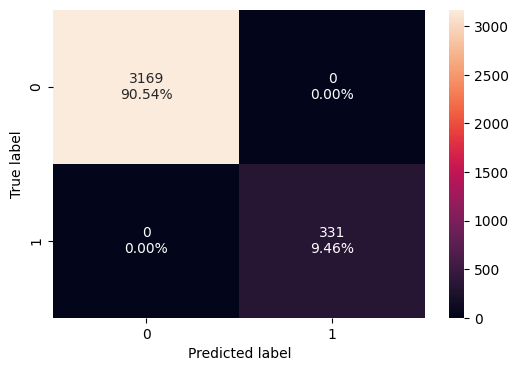

In [61]:
confusion_matrix_sklearn(model, X_train, y_train)

In [62]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


Checking model performance on test set

In [63]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.981333,0.899329,0.911565,0.905405


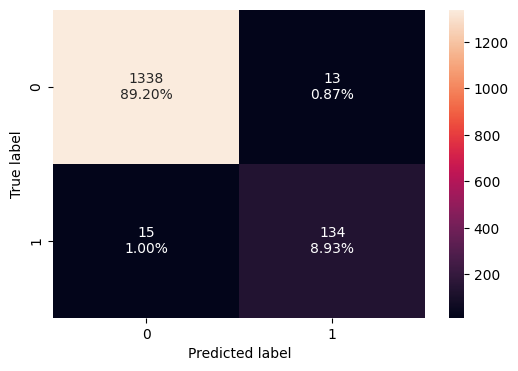

In [64]:
confusion_matrix_sklearn(model, X_test, y_test)

Visualizing the Decision Tree

In [66]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_Professional', 'Education_Undergraduate']


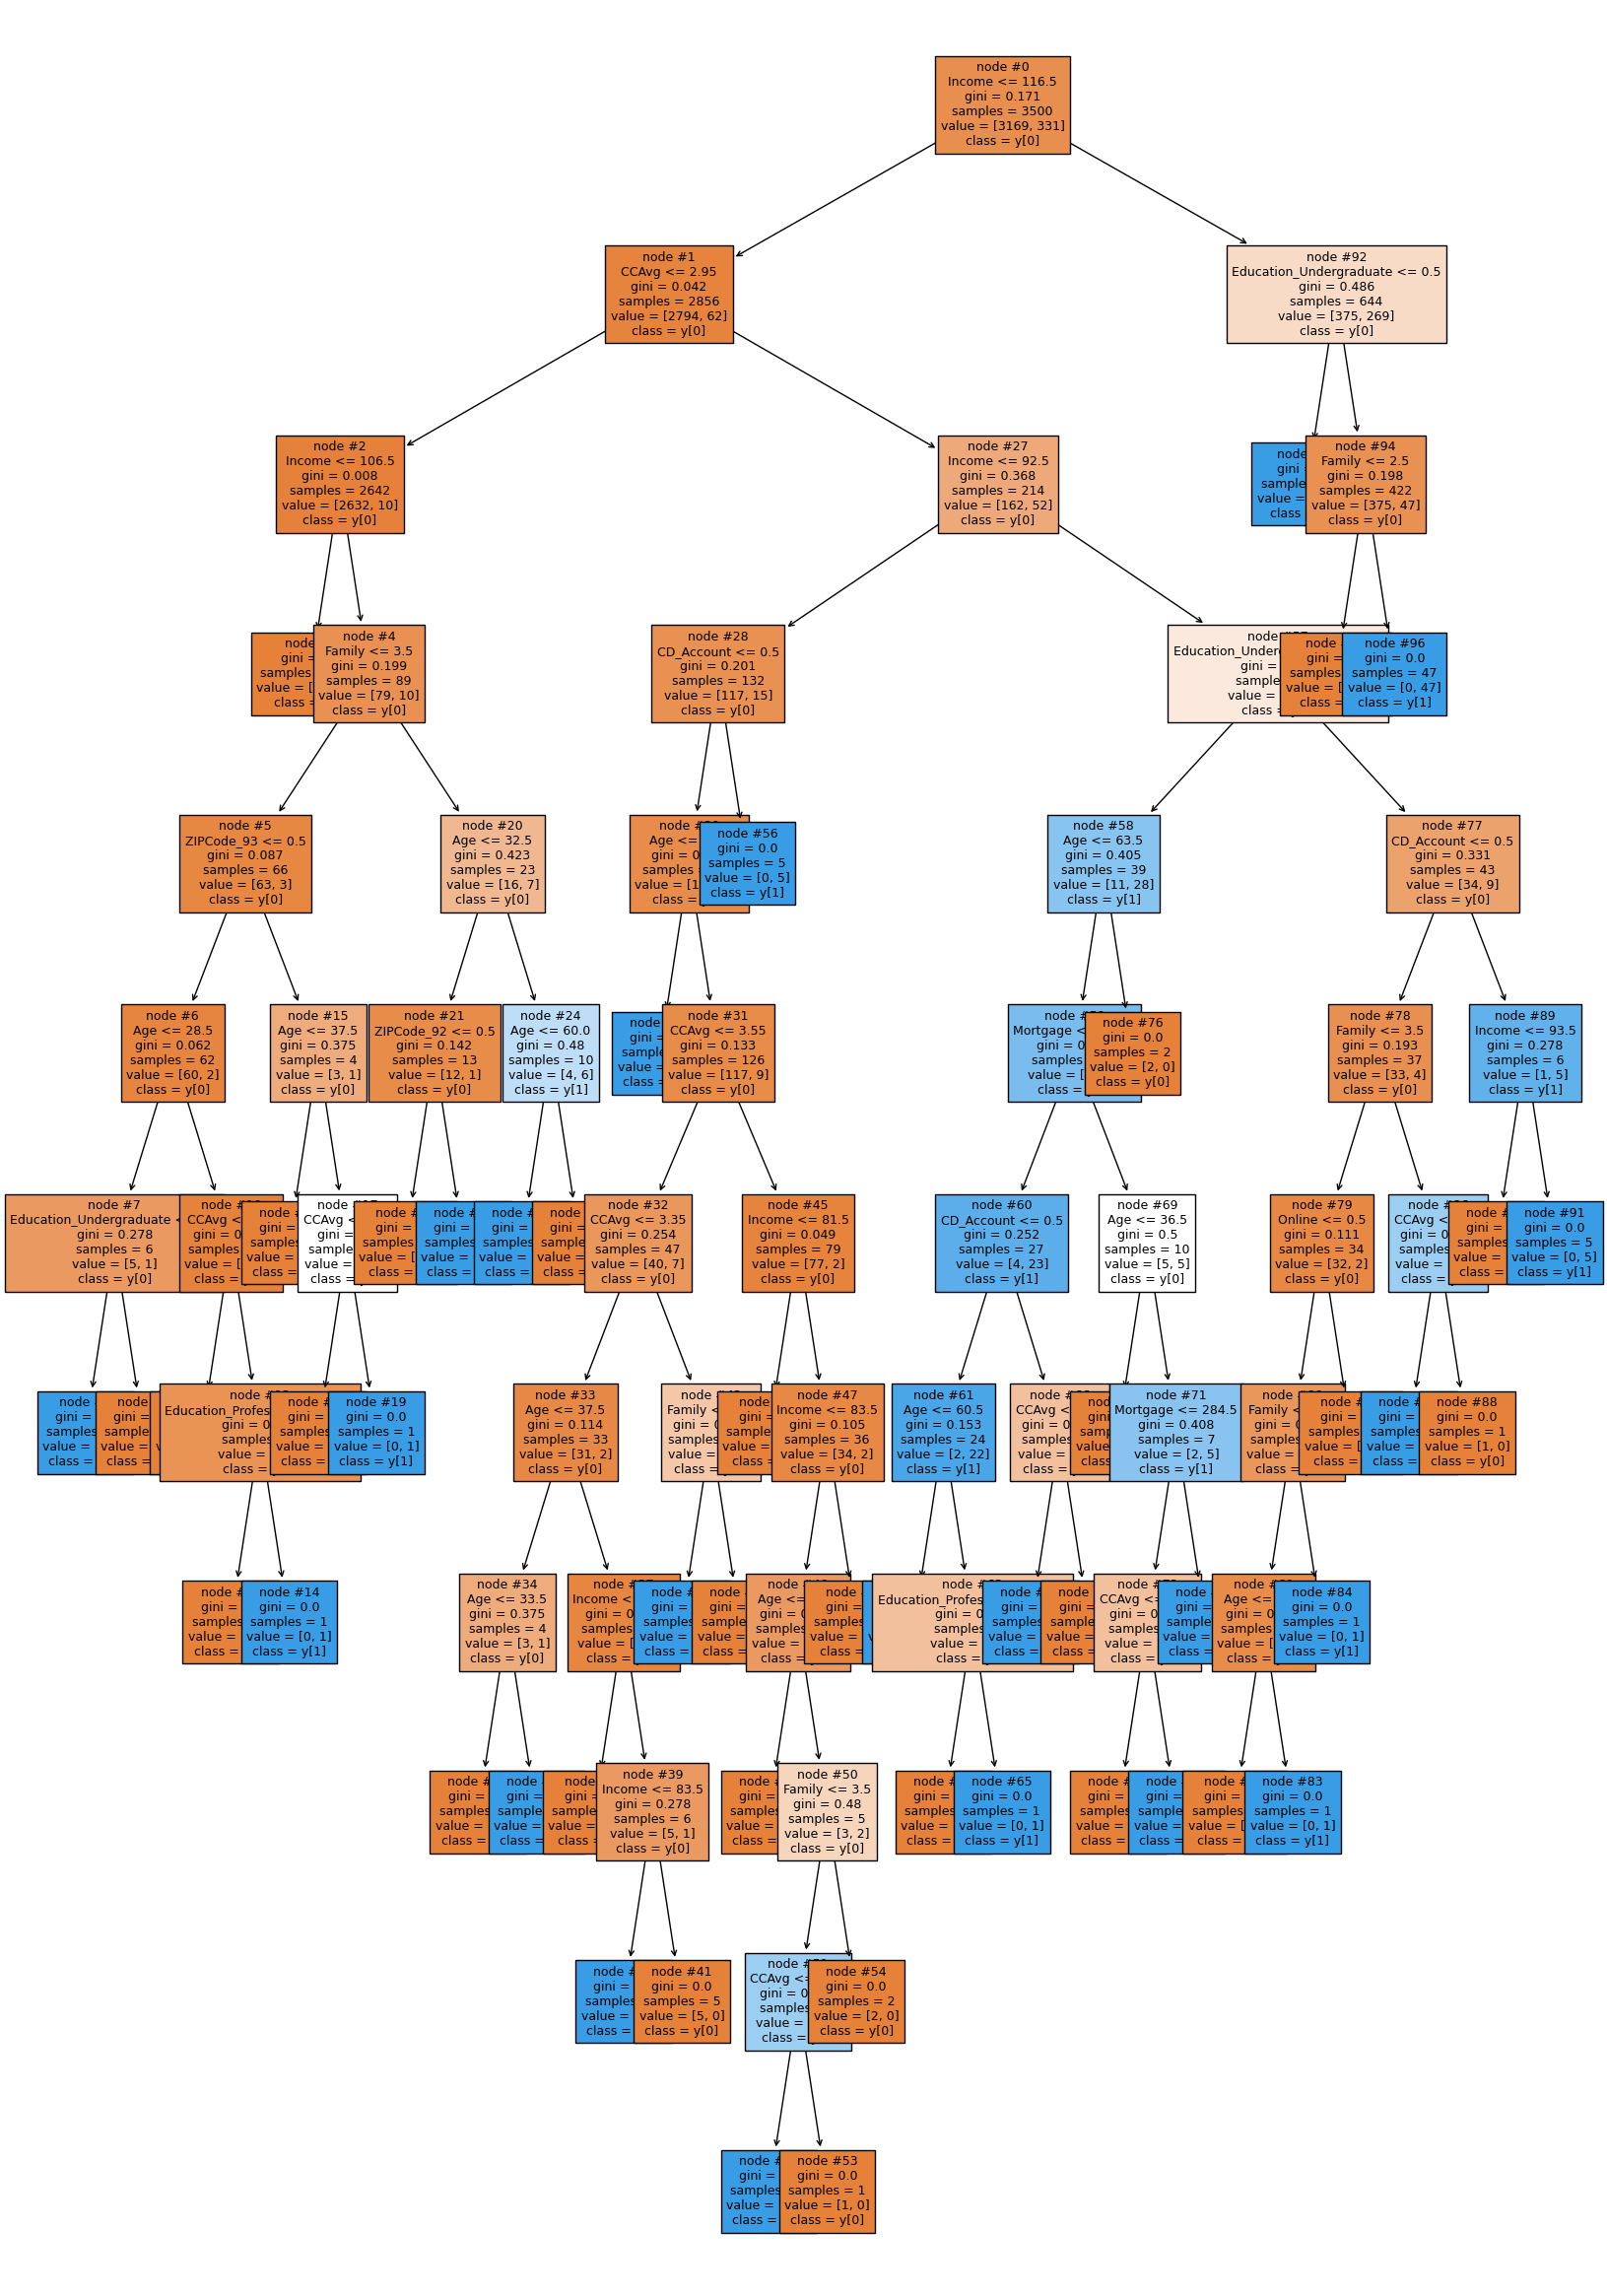

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93

<function matplotlib.pyplot.show(close=None, block=None)>

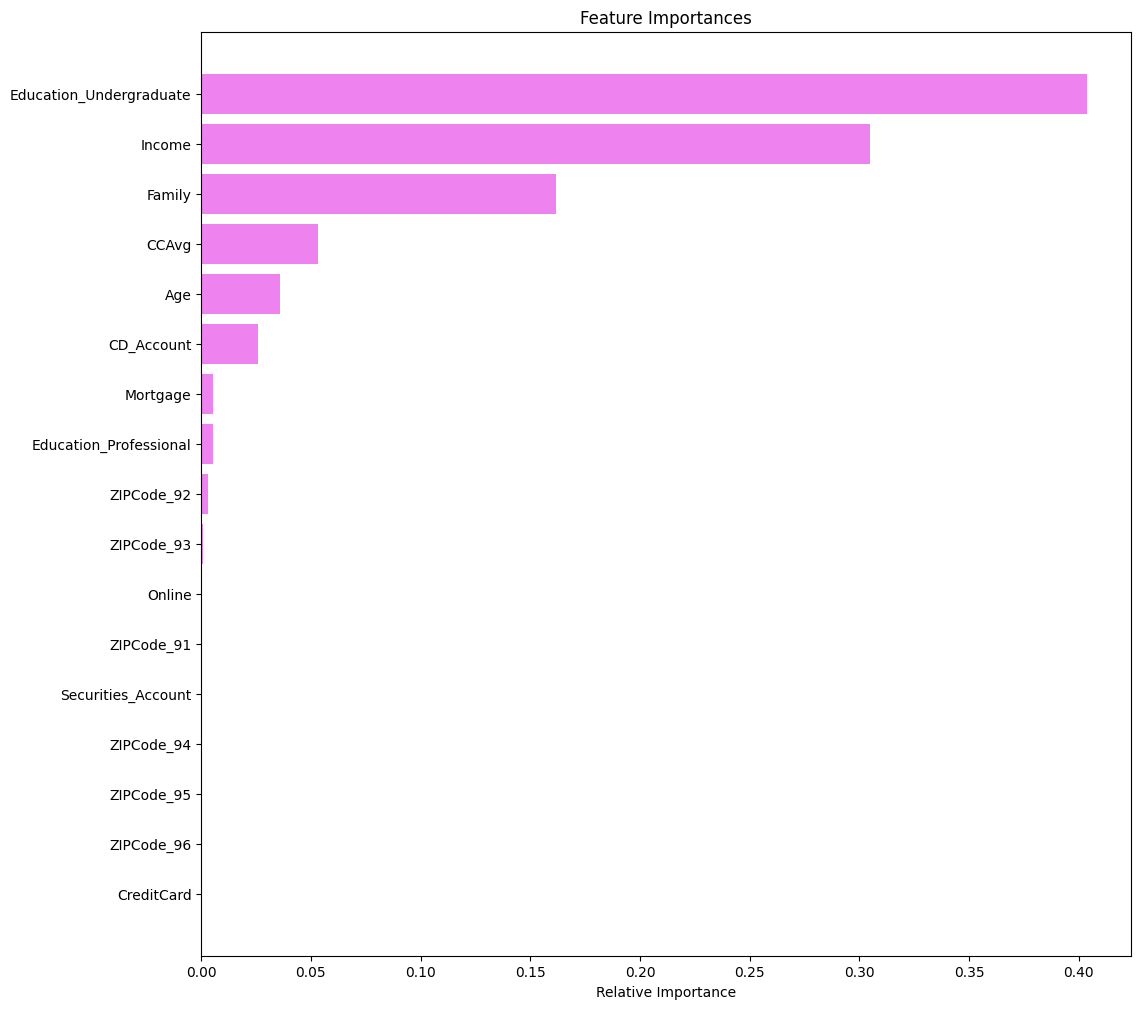

In [67]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show

In [68]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93

In [69]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.403732
Income                   0.304761
Family                   0.161717
CCAvg                    0.053107
Age                      0.036035
CD_Account               0.025711
Mortgage                 0.005557
Education_Professional   0.005144
ZIPCode_92               0.003080
ZIPCode_93               0.000594
Online                   0.000561
Securities_Account       0.000000
ZIPCode_91               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
CreditCard               0.000000


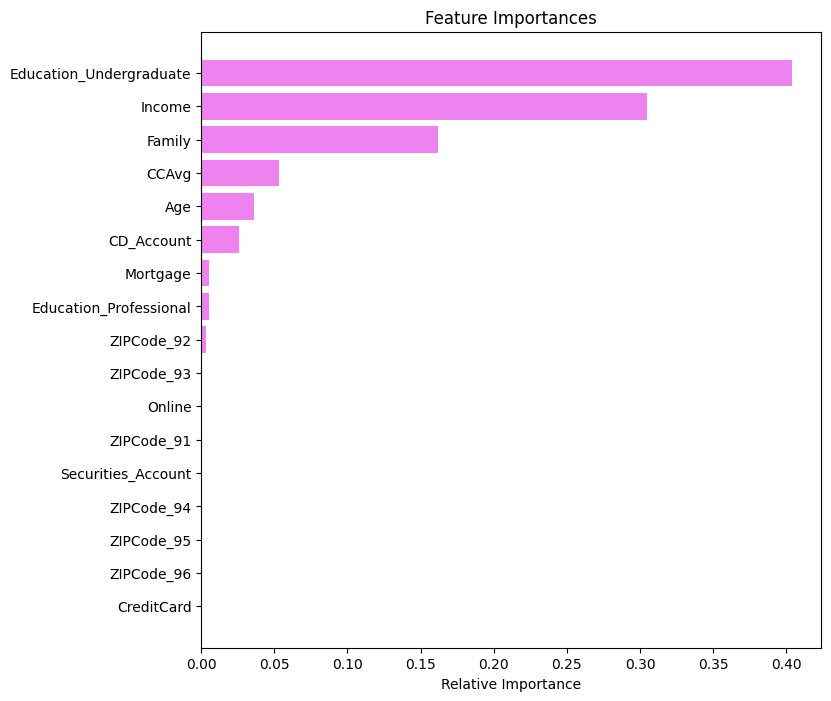

In [70]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Comparison and Final Model Selection

#### Pre-Pruning
* Using GridSearch for Hyperparameter tuning of our tree model
* Grid search allows us to exhaustively test all possible hyperparameter configurations that we are interested in tuning.
* Grid search will exhaustively test all possible combinations of these hyperparameters, training an SVM for each set.

#### Observation
* With Pre-Pruning Overfitting of the model has reduced but there is not a lot of improvement in the Recall
* post-pruning needs to be tried for better results

In [73]:
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

estimator.fit(X_train, y_train) ## Complete the code to fit model on train data

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=1)

#### Checking performance on training set

In [74]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.990286,0.927492,0.968454,0.947531


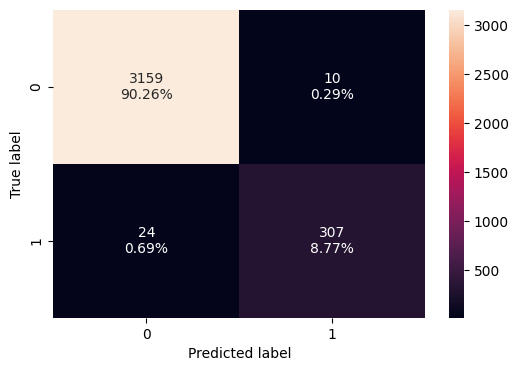

In [75]:
confusion_matrix_sklearn(estimator, X_train, y_train)

Checking model performance on test set




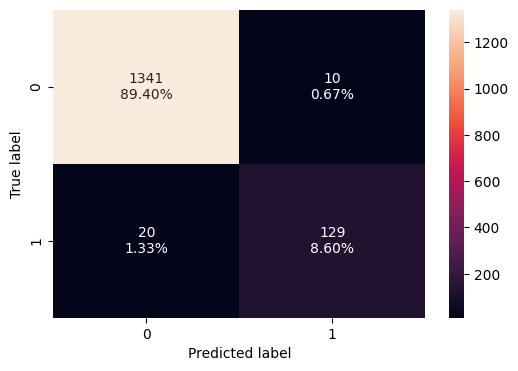

In [77]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [78]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test


,Accuracy,Recall,Precision,F1
0,0.98,0.865772,0.928058,0.895833


Visualizing the Decision Tree

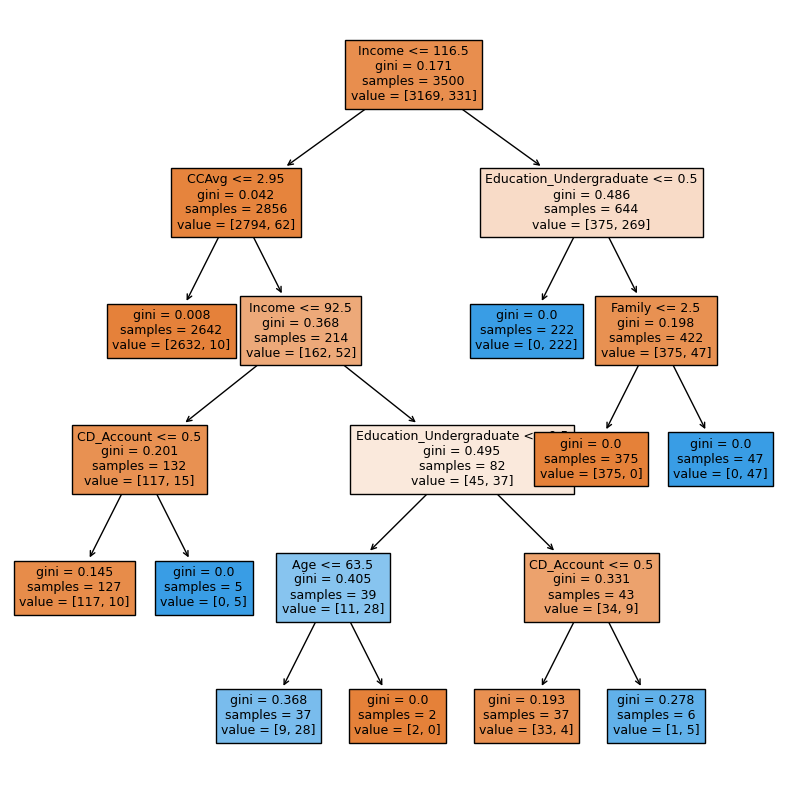

In [79]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [80]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |--- Age <= 63.50
|   |   |   |   |   |--- weights: [9.00, 28.00] class: 1
|   |   |   |   |--- Age >  63.50
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|--- Income >  116.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [0.00, 222.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.

In [81]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.446191
Income                   0.327387
Family                   0.155083
CCAvg                    0.042061
CD_Account               0.025243
Age                      0.004035
Securities_Account       0.000000
Online                   0.000000
Mortgage                 0.000000
ZIPCode_91               0.000000
ZIPCode_92               0.000000
ZIPCode_93               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
Education_Professional   0.000000
CreditCard               0.000000


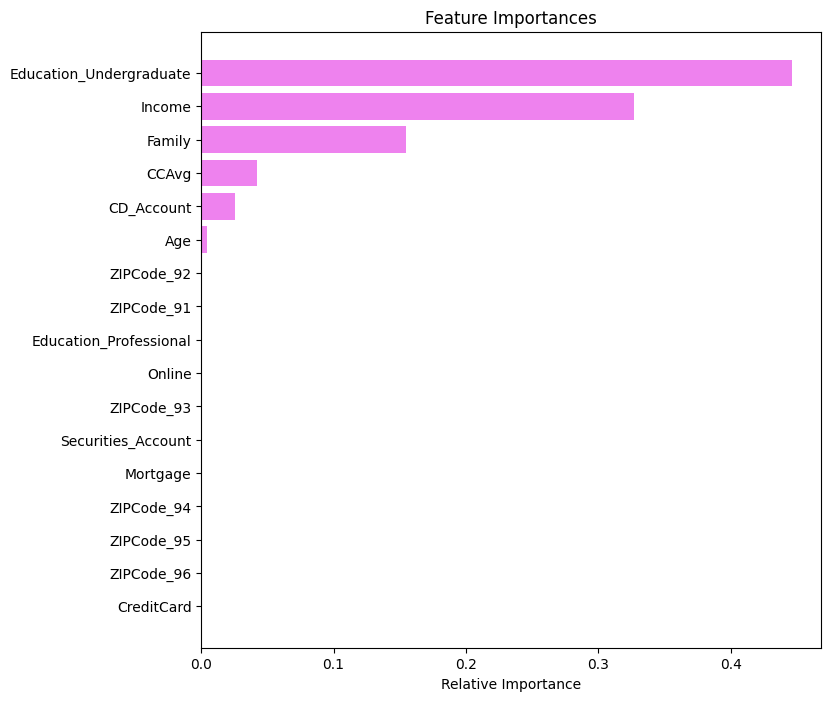

In [82]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___